# Layered Charts

A `LayeredChart` allows you to stack multiple individual charts on top of each other as layers. For example, this could be used to create a chart with both lines and points.

## Imports

In [1]:
from altair import *
import pandas as pd
import numpy as np

## Data

In [2]:
data1 = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)})
data2 = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)})

In [3]:
data1.head()

,x,y
0,0.301007,0.153538
1,0.133490,0.736558
2,0.862688,0.020897
3,0.430648,0.305620
4,0.601145,0.264920


## Layered charts

If all layers will use the same data, you can create a `LayeredChart` with the data:

In [4]:
chart = LayeredChart(data1)

Layers are then added to the chart by creating individual `Chart` instances (with marks and encoding) and adding them to the `LayeredChart` using the `+=` operator:

In [5]:
l1 = Chart().mark_line().encode(x='x:Q', y='y:Q')
l2 = Chart().mark_point().encode(x='x:Q', y='y:Q')

In [6]:
chart += l1
chart += l2

The layers are stored as a list under the `layers` attribute:

In [7]:
chart.layers

[<altair.api.Chart at 0x106531320>, <altair.api.Chart at 0x1065312e8>]

Displaying the chart will automatically combine the different layers into a single chart, with the appropriate axes:

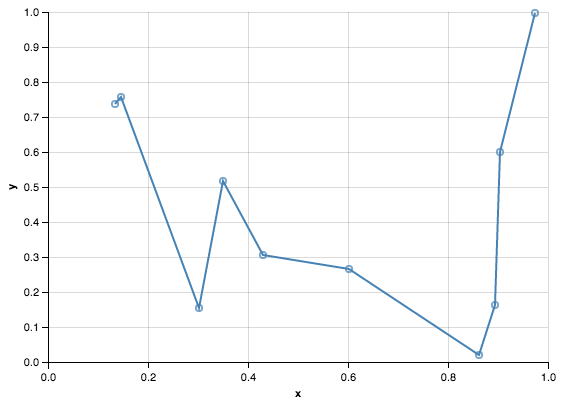

In [8]:
chart

If each chart has its own data, you can create individual `Chart` objects, each with their own data, and them simply add them together:

In [9]:
chart2 = Chart(data1).mark_line(color='#1f77b4').encode(x='x', y='y') + \
         Chart(data2).mark_point(color='#ff7f0e').encode(x='x', y='y')

In [10]:
chart2.layers

[<altair.api.Chart at 0x10653b2e8>, <altair.api.Chart at 0x10653b400>]

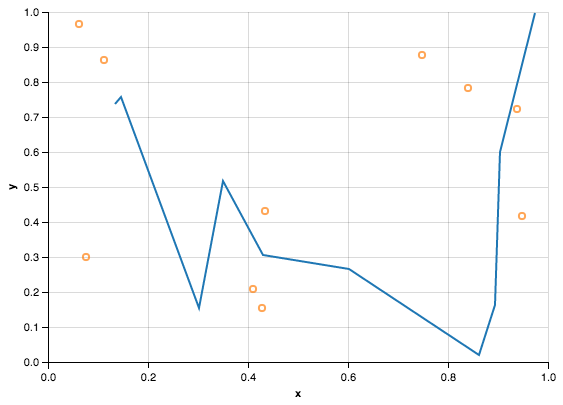

In [11]:
chart2